In [1]:
from __future__ import print_function
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import math

In [2]:
from scipy.stats import entropy
import timeit

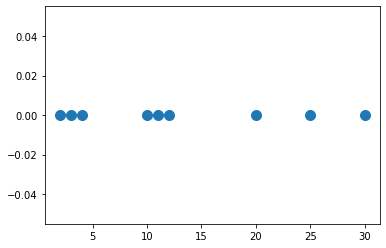

In [3]:
X = np.array(([2,0],[3,0],[4,0],[10,0],[11,0],[12,0],[20,0],[25,0],[30,0]))
plt.scatter(X[:,0], X[:,1],s=100)
plt.show()

In [4]:
model1 = KMeans(n_clusters = 2, init=np.array([[3,0],[4,0]]), n_init=1, max_iter=1,random_state=1).fit(X)
c0, c1 = model1.cluster_centers_
c0,c1

(array([2.5, 0. ]), array([16.,  0.]))

In [5]:
model1.score(X), model1.labels_

(-372.75, array([0, 0, 0, 1, 1, 1, 1, 1, 1]))

In [6]:
def kmeans_df(model,c0,c1):
    df=pd.DataFrame(np.hstack([X, 
                               np.linalg.norm(X-c0, axis=1)[:,np.newaxis],
                               np.linalg.norm(X-c1, axis=1)[:,np.newaxis],
                               model.labels_[:,np.newaxis]]),
                    columns=["x좌표","y좌표","군집거리0","군집거리1","군집결과"])
    return df

In [7]:
kmeans_df(model1,c0,c1)

,x좌표,y좌표,군집거리0,군집거리1,군집결과
0,2.0,0.0,0.5,14.0,0.0
1,3.0,0.0,0.5,13.0,0.0
2,4.0,0.0,1.5,12.0,0.0
3,10.0,0.0,7.5,6.0,1.0
4,11.0,0.0,8.5,5.0,1.0
5,12.0,0.0,9.5,4.0,1.0
6,20.0,0.0,17.5,4.0,1.0
7,25.0,0.0,22.5,9.0,1.0
8,30.0,0.0,27.5,14.0,1.0


In [8]:
def plot_cluster(model,c0,c1):
    plt.scatter(X[model.labels_==0,0], X[model.labels_==0,1], s=100, marker='v',c='r')
    plt.scatter(c0[0],c0[1],s=200,c='r')
    plt.scatter(X[model.labels_==1,0], X[model.labels_==1,1], s=100, marker='^',c='b')
    plt.scatter(c1[0],c1[1],s=200,c='b')
    plt.show()

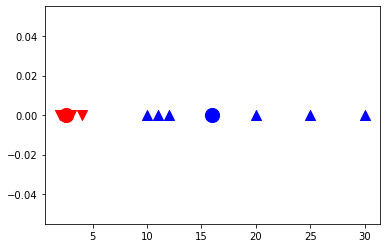

In [9]:
plot_cluster(model1,c0,c1)

In [10]:
#kmean 2회차
model1 = KMeans(n_clusters = 2, init=np.array([[2.5,0],[16,0]]), n_init=1, max_iter=1,random_state=1).fit(X)
c0, c1 = model1.cluster_centers_
c0,c1

(array([3., 0.]), array([18.,  0.]))

In [11]:
model1.score(X), model1.labels_

(-333.0, array([0, 0, 0, 0, 1, 1, 1, 1, 1]))

In [12]:
kmeans_df(model1,c0,c1)

,x좌표,y좌표,군집거리0,군집거리1,군집결과
0,2.0,0.0,1.0,16.0,0.0
1,3.0,0.0,0.0,15.0,0.0
2,4.0,0.0,1.0,14.0,0.0
3,10.0,0.0,7.0,8.0,0.0
4,11.0,0.0,8.0,7.0,1.0
5,12.0,0.0,9.0,6.0,1.0
6,20.0,0.0,17.0,2.0,1.0
7,25.0,0.0,22.0,7.0,1.0
8,30.0,0.0,27.0,12.0,1.0


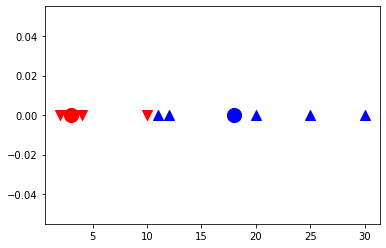

In [13]:
plot_cluster(model1,c0,c1)

In [14]:
#kmean 3회차
model1 = KMeans(n_clusters = 2, init=np.array([[3,0],[18,0]]), n_init=1, max_iter=1,random_state=1).fit(X)
c0, c1 = model1.cluster_centers_
c0,c1

(array([4.75, 0.  ]), array([19.6,  0. ]))

In [15]:
model1.score(X), model1.labels_

(-267.85499999999996, array([0, 0, 0, 0, 0, 0, 1, 1, 1]))

In [16]:
kmeans_df(model1,c0,c1)

,x좌표,y좌표,군집거리0,군집거리1,군집결과
0,2.0,0.0,2.75,17.6,0.0
1,3.0,0.0,1.75,16.6,0.0
2,4.0,0.0,0.75,15.6,0.0
3,10.0,0.0,5.25,9.6,0.0
4,11.0,0.0,6.25,8.6,0.0
5,12.0,0.0,7.25,7.6,0.0
6,20.0,0.0,15.25,0.4,1.0
7,25.0,0.0,20.25,5.4,1.0
8,30.0,0.0,25.25,10.4,1.0


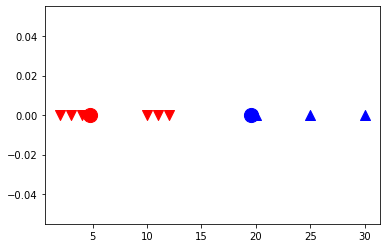

In [17]:
plot_cluster(model1,c0,c1)

In [18]:
#kmean 4회차
model1 = KMeans(n_clusters = 2, init=np.array([[4.75,0],[19.6,0]]), n_init=1, max_iter=1,random_state=1).fit(X)
c0, c1 = model1.cluster_centers_
c0,c1

(array([7., 0.]), array([25.,  0.]))

In [19]:
model1.score(X), model1.labels_

(-150.0, array([0, 0, 0, 0, 0, 0, 1, 1, 1]))

In [20]:
kmeans_df(model1,c0,c1)

,x좌표,y좌표,군집거리0,군집거리1,군집결과
0,2.0,0.0,5.0,23.0,0.0
1,3.0,0.0,4.0,22.0,0.0
2,4.0,0.0,3.0,21.0,0.0
3,10.0,0.0,3.0,15.0,0.0
4,11.0,0.0,4.0,14.0,0.0
5,12.0,0.0,5.0,13.0,0.0
6,20.0,0.0,13.0,5.0,1.0
7,25.0,0.0,18.0,0.0,1.0
8,30.0,0.0,23.0,5.0,1.0


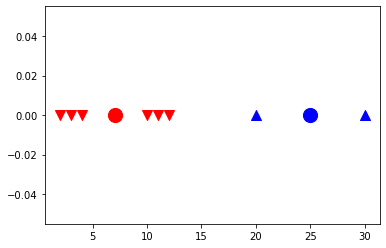

In [21]:
plot_cluster(model1,c0,c1)

In [22]:
#kmean 5회차
model1 = KMeans(n_clusters = 2, init=np.array([[7,0],[25,0]]), n_init=1, max_iter=1,random_state=1).fit(X)
c0, c1 = model1.cluster_centers_
c0,c1

(array([7., 0.]), array([25.,  0.]))

In [23]:
model1.score(X), model1.labels_

(-150.0, array([0, 0, 0, 0, 0, 0, 1, 1, 1]))

In [24]:
kmeans_df(model1,c0,c1)

,x좌표,y좌표,군집거리0,군집거리1,군집결과
0,2.0,0.0,5.0,23.0,0.0
1,3.0,0.0,4.0,22.0,0.0
2,4.0,0.0,3.0,21.0,0.0
3,10.0,0.0,3.0,15.0,0.0
4,11.0,0.0,4.0,14.0,0.0
5,12.0,0.0,5.0,13.0,0.0
6,20.0,0.0,13.0,5.0,1.0
7,25.0,0.0,18.0,0.0,1.0
8,30.0,0.0,23.0,5.0,1.0


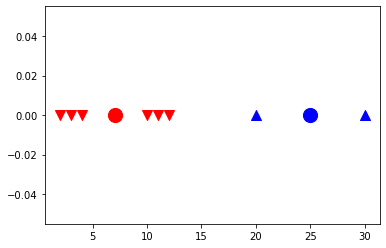

In [25]:
plot_cluster(model1,c0,c1)

In [26]:
#kmean
model1 = KMeans(n_clusters = 2, init=np.array([[3,0],[4,0]]), n_init=1, max_iter=10,random_state=1).fit(X)
c0, c1 = model1.cluster_centers_
c0,c1

(array([7., 0.]), array([25.,  0.]))

In [27]:
model1.score(X), model1.labels_

(-150.0, array([0, 0, 0, 0, 0, 0, 1, 1, 1]))

In [28]:
kmeans_df(model1,c0,c1)

,x좌표,y좌표,군집거리0,군집거리1,군집결과
0,2.0,0.0,5.0,23.0,0.0
1,3.0,0.0,4.0,22.0,0.0
2,4.0,0.0,3.0,21.0,0.0
3,10.0,0.0,3.0,15.0,0.0
4,11.0,0.0,4.0,14.0,0.0
5,12.0,0.0,5.0,13.0,0.0
6,20.0,0.0,13.0,5.0,1.0
7,25.0,0.0,18.0,0.0,1.0
8,30.0,0.0,23.0,5.0,1.0


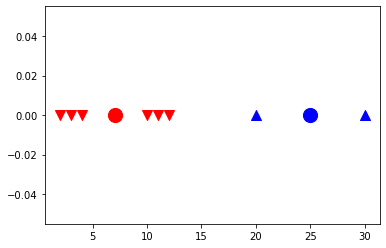

In [29]:
plot_cluster(model1,c0,c1)

In [30]:
#kmean
model1 = KMeans(n_clusters = 2, init='random', n_init=20, max_iter=10,random_state=1).fit(X)
c0, c1 = model1.cluster_centers_
c0,c1

(array([25.,  0.]), array([7., 0.]))